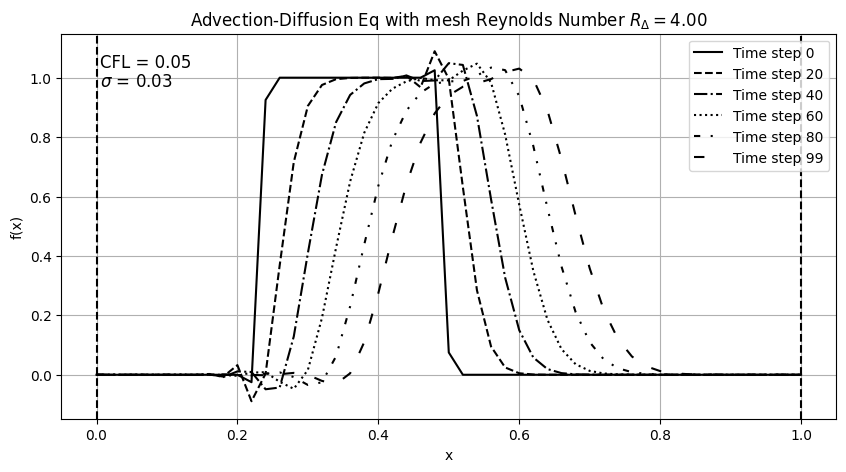

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

# Parameters
nx = 51  # Number of spatial grid points
nt = 100  # Number of time steps
L = 1.0  # Length of the domain
T = 0.1  # Total time
U = 2  # Advection speed
D = 0.01  # Diffusion coefficient (adjust D for Pe < 2 and Pe > 2 cases)

x = np.linspace(0, L, nx)
dx = L / (nx - 1)  # Grid spacing
dt = T / nt  # Time step size

# Peclet number based on grid spacing and diffusion coefficient
Pe = U * dx / D

# Initial condition (step-like)
f = np.zeros(nx)
f[int(nx / 4):int(nx / 2)] = 1.0  # Step initial condition in the middle

# Boundary conditions (set f at boundaries to 0 at all times)
f[0], f[-1] = 0, 0

# Scheme coefficients
Cr = U * dt / (2 * dx)  # Courant number for advection
sigma = D * dt / (dx**2)  # Diffusion number

# Create a cycle for different line styles
line_styles = cycle(['-', '--', '-.', ':', (0, (3, 5, 1, 5, 1, 5)), (0, (5, 10)), (0, (1, 1))])

# Function to compute next time step using the scheme with boundary conditions
def step(f, Cr, sigma):
    f_new = np.copy(f)
    for j in range(1, nx - 1):
        f_new[j] = (f[j] - Cr * (f[j + 1] - f[j - 1])
                    + sigma * (f[j + 1] - 2 * f[j] + f[j - 1]))
    # Apply boundary conditions
    f_new[0] = 0  # Left boundary
    f_new[-1] = 0  # Right boundary
    return f_new

# Create figure for plots
plt.figure(figsize=(10, 5))

# Time-stepping loop
for n in range(nt):
    f = step(f, Cr, sigma)
    # Plot every 20 time steps and the final time step
    if n % 20 == 0 or n == nt - 1:
        style = next(line_styles)
        plt.plot(x, f, linestyle=style, color='k', label=f'Time step {n}')

# Plot the results
plt.title(f'Advection-Diffusion Eq with mesh Reynolds Number $R_\\Delta= {Pe:.2f}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# Draw physical boundaries
plt.axvline(x=0, color='k', linestyle='--', label='Left boundary (x=0)')
plt.axvline(x=L, color='k', linestyle='--', label='Right boundary (x=L)')

# Add annotations for Courant and Diffusion numbers
plt.text(0.05, 0.95, f"CFL = {Cr:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f"$\\sigma$ = {sigma:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.savefig('PecletProblem2.png', dpi=300, format='png')
plt.show()
